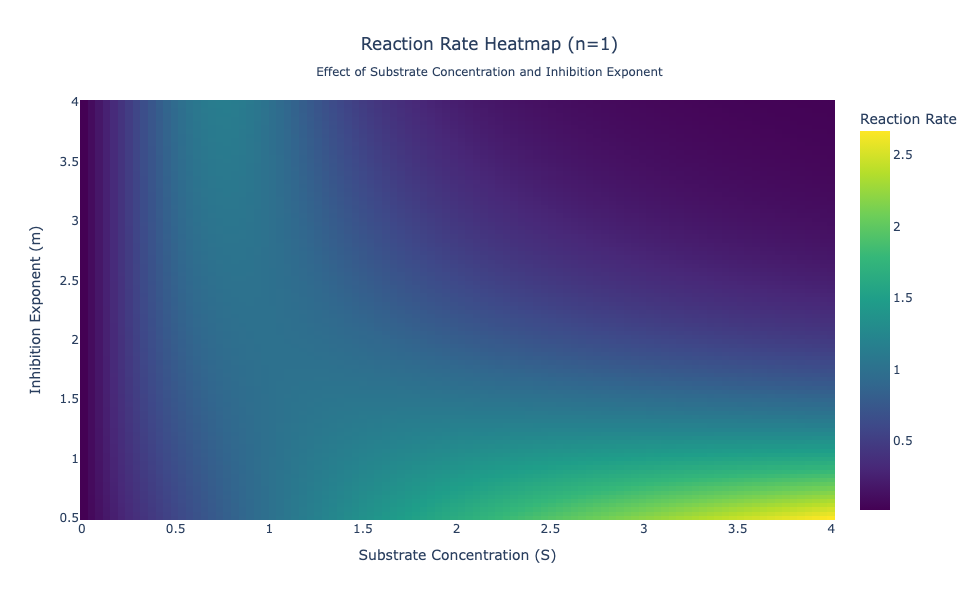

In [1]:
from numpy import linspace, meshgrid
import plotly.graph_objects as go

def kinetics(S, k_max, K_m, n, m):
    """
    Hill kinetics equation; reduces to Michaelis-Menten for n=1
    S: substrate concentration
    k_max: maximum reaction rate (includes enzyme concentration)
    K_m: Michaelis constant (fixed at 1)
    n: Hill exponent
    m: inhibition exponent (n<=m)
    """
    rate = (k_max * S**n) / (K_m + S**m)
    return rate

# Fixed parameters
k_max, K_m, n = 2, 1, 1

# Create 2D grid
S_values = linspace(0.01, 4, 100)  # Start slightly above 0 to avoid division issues
m_values = linspace(0.5, 4, 100)

# Create meshgrid
S_grid, m_grid = meshgrid(S_values, m_values)

# Calculate rate for all combinations
rate_grid = kinetics(S_grid, k_max, K_m, n, m_grid)

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    x=S_values,
    y=m_values,
    z=rate_grid,
    colorscale='Viridis',  # Try 'RdYlBu', 'Jet', 'Hot', etc.
    colorbar=dict(title="Reaction Rate"),
    hoverongaps=False,
    hovertemplate='S: %{x:.2f}<br>m: %{y:.2f}<br>Rate: %{z:.2f}<extra></extra>'
))

fig.update_layout(
    title=dict(
        text="Reaction Rate Heatmap (n=1)<br><sub>Effect of Substrate Concentration and Inhibition Exponent</sub>",
        x=0.5
    ),
    xaxis=dict(title="Substrate Concentration (S)"),
    yaxis=dict(title="Inhibition Exponent (m)"),
    width=700,
    height=600
)

fig.show()

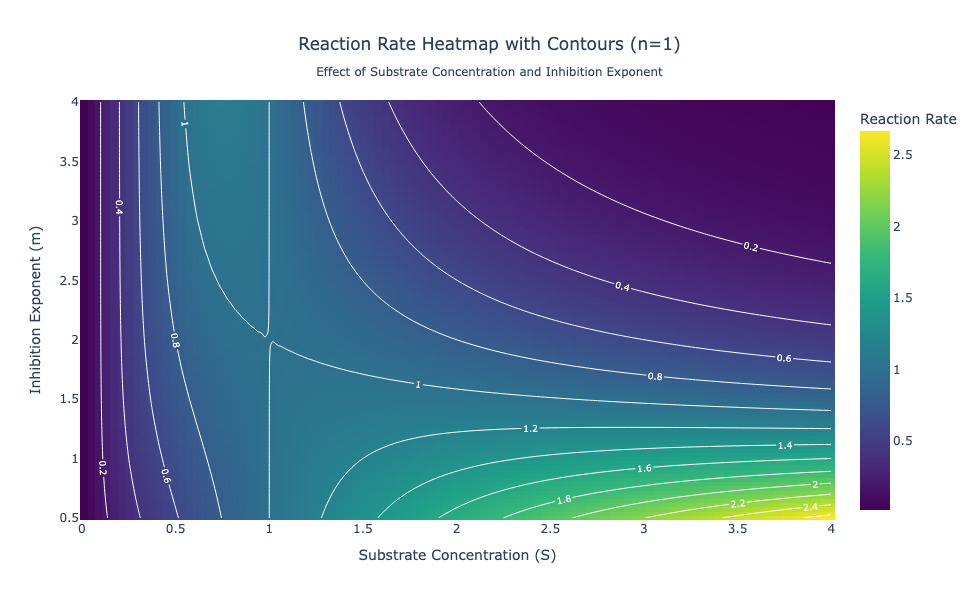

In [2]:
# Combine heatmap with contour lines
fig = go.Figure()

# Add heatmap
fig.add_trace(go.Heatmap(
    x=S_values,
    y=m_values,
    z=rate_grid,
    colorscale='Viridis',
    colorbar=dict(title="Reaction Rate"),
    hoverongaps=False,
    showscale=True
))

# Add contour lines on top
fig.add_trace(go.Contour(
    x=S_values,
    y=m_values,
    z=rate_grid,
    showscale=False,
    contours=dict(
        showlabels=True,
        labelfont=dict(size=9, color='white'),
        coloring='none'
    ),
    line=dict(width=1, color='white'),
    hoverinfo='skip'
))

fig.update_layout(
    title=dict(
        text="Reaction Rate Heatmap with Contours (n=1)<br><sub>Effect of Substrate Concentration and Inhibition Exponent</sub>",
        x=0.5
    ),
    xaxis=dict(title="Substrate Concentration (S)"),
    yaxis=dict(title="Inhibition Exponent (m)"),
    width=700,
    height=600
)

fig.show()

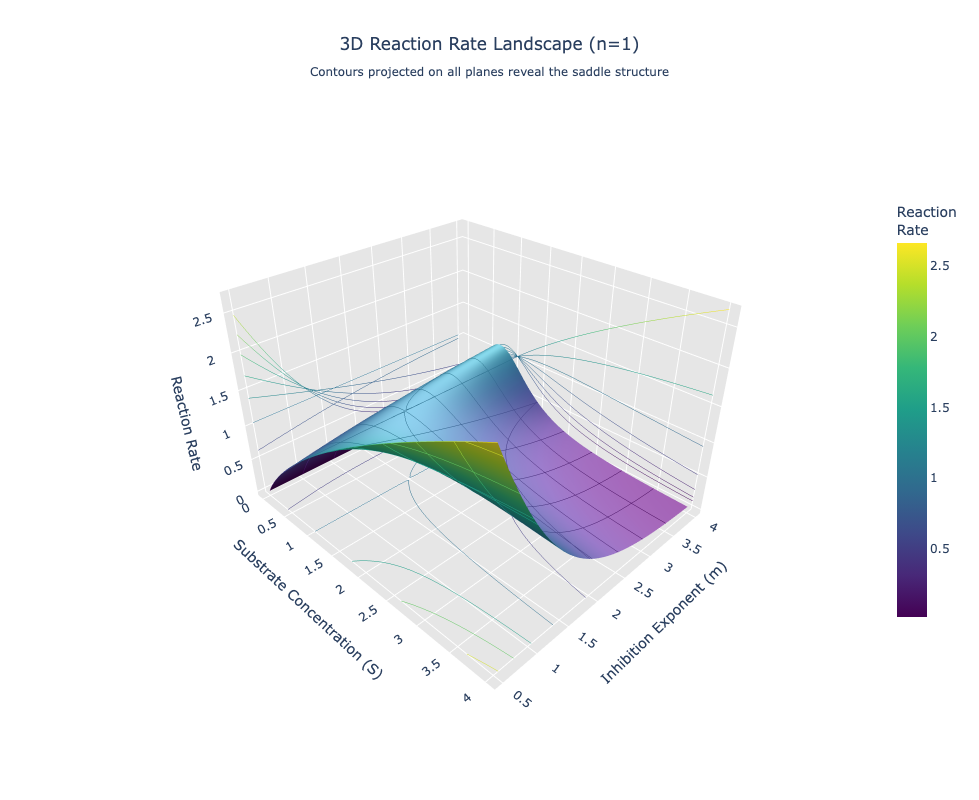

In [7]:
from numpy import linspace, meshgrid
import plotly.graph_objects as go

def kinetics(S, k_max, K_m, n, m):
    """
    Hill kinetics equation; reduces to Michaelis-Menten for n=1
    S: substrate concentration
    k_max: maximum reaction rate (includes enzyme concentration)
    K_m: Michaelis constant (fixed at 1)
    n: Hill exponent
    m: inhibition exponent (n<=m)
    """
    rate = (k_max * S**n) / (K_m + S**m)
    return rate

# Fixed parameters
k_max, K_m, n = 2, 1, 1

# Create 2D grid
S_values = linspace(0.01, 4, 100)  # Start slightly above 0
m_values = linspace(0.5, 4, 100)

# Create meshgrid
S_grid, m_grid = meshgrid(S_values, m_values)

# Calculate rate for all combinations
rate_grid = kinetics(S_grid, k_max, K_m, n, m_grid)

# Create 3D surface with contours projected on all three planes
fig = go.Figure(data=[go.Surface(
    x=S_values,
    y=m_values,
    z=rate_grid,
    colorscale='Viridis',
    colorbar=dict(title="Reaction<br>Rate", len=0.7),
    hovertemplate='S: %{x:.2f}<br>m: %{y:.2f}<br>Rate: %{z:.2f}<extra></extra>',
    lighting=dict(
        ambient=0.6,
        diffuse=0.8,
        specular=0.3,
        roughness=0.5
    ),
    contours=dict(
        x=dict(show=True, usecolormap=True, highlightcolor="white", project=dict(x=True)),
        y=dict(show=True, usecolormap=True, highlightcolor="white", project=dict(y=True)),
        z=dict(show=True, usecolormap=True, highlightcolor="white", project=dict(z=True))
    )
)])

fig.update_layout(
    title=dict(
        text="3D Reaction Rate Landscape (n=1)<br><sub>Contours projected on all planes reveal the saddle structure</sub>",
        x=0.5
    ),
    scene=dict(
        xaxis=dict(title="Substrate Concentration (S)", backgroundcolor="rgb(230, 230,230)"),
        yaxis=dict(title="Inhibition Exponent (m)", backgroundcolor="rgb(230, 230,230)"),
        zaxis=dict(title="Reaction Rate", backgroundcolor="rgb(230, 230,230)"),
        camera=dict(
            eye=dict(x=1.5, y=-1.5, z=1.3)  # Initial viewing angle
        )
    ),
    width=900,
    height=800
)

fig.show()
